# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Import Dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# Find Optimal K(Number of Clusters) Using Dendrogram

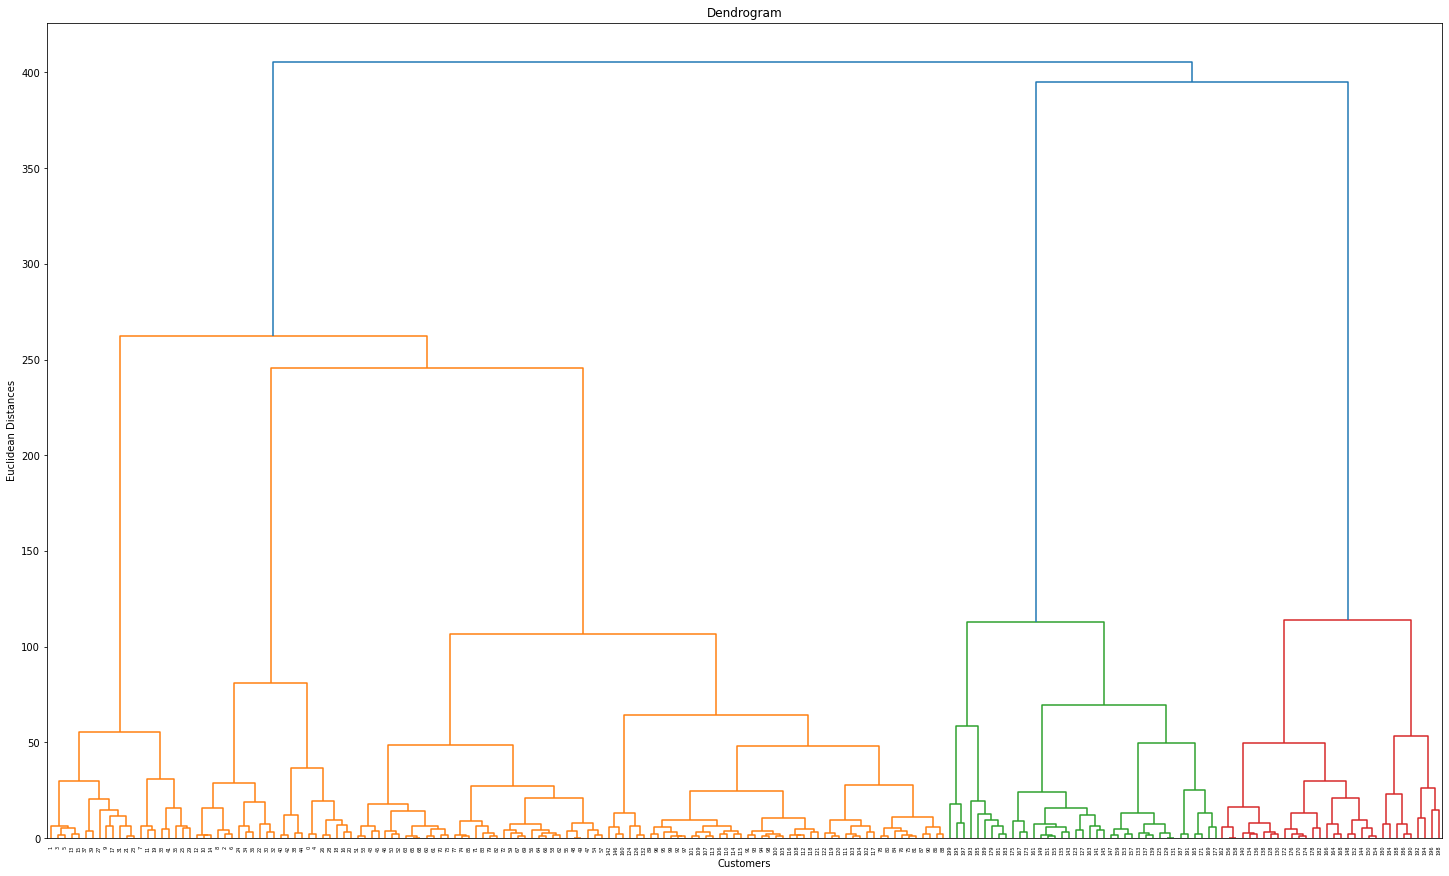

In [3]:
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

From the dendrogram, it can be seen that k=5 or 3 is optimal.<br>
Therefore, there are 5 clusters namely 1, 2, 3, 4, 5.<br>
That is, there are 5 groups of customers in the mall.<br>

# Training Hierarchical Clustering

In [4]:
hc = AgglomerativeClustering(5,affinity='euclidean', linkage='ward')
y = hc.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [5]:
dataset['Clusters'] =y
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


# Visualize Clusters

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

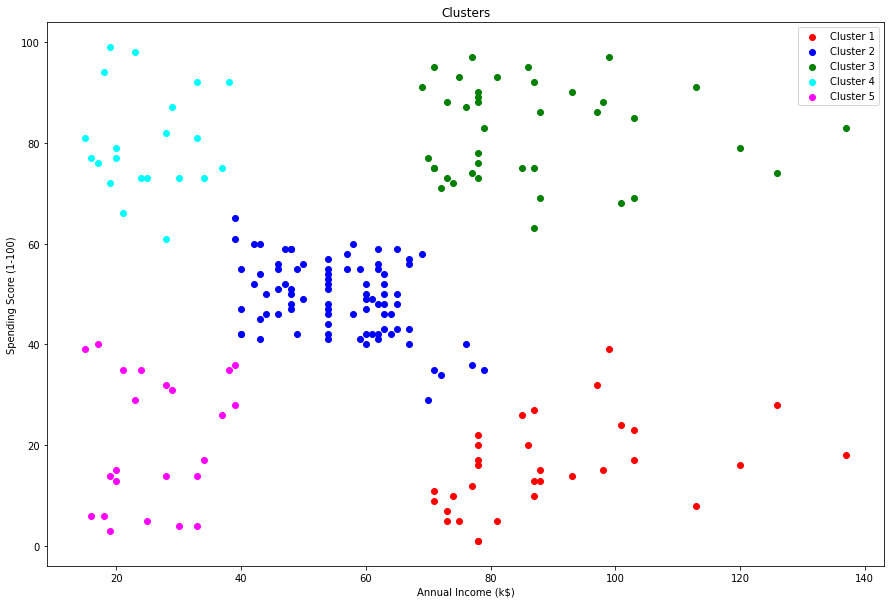

In [7]:
plt.figure(figsize=(15, 10));

plt.scatter(X[y ==0, 0], X[y ==0, 1],c='red', label='Cluster 1');
plt.scatter(X[y ==1, 0], X[y ==1, 1],c='blue', label='Cluster 2');
plt.scatter(X[y ==2, 0], X[y ==2, 1],c='green', label='Cluster 3');
plt.scatter(X[y ==3, 0], X[y ==3, 1],c='cyan', label='Cluster 4');
plt.scatter(X[y ==4, 0], X[y ==4, 1],c='magenta', label='Cluster 5');

#plt.scatter(hc.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='black', marker='v', s=100, label='Centroids');

plt.title('Clusters')
plt.xlabel('Annual Income (k$)');
plt.ylabel('Spending Score (1-100)');
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']);
plt.show();

# Analysis
- Cluster 5 (Magenta) : People with low annual income and who spends lower in the mall. These are customers still less targeted.
<br><br>
- Cluster 1 (Red) : People with high annual income and who still doesn't spend much money in the mall. These customers can be targeted so that they can be tempted to spend more in the mall. These are the customers with 3rd priority to be targeted (1 - Cluster 5, 2 - Cluster 2).
<br><br>
- Cluster 4 (Cyan) : People with low annual income and who spend a lot in the mall. These Customers are less targeted by the mall (if the mall wishes to so that the people with low income doesn't need to spend too much in the mall - ethics).
<br><br>
- Cluster 3 (Green) : People with higher annual income and who spends more in the mall. These customers are likely to buy more in the mall so they are the priority targets for the mall.
<br><br>
- Cluster 2 (Blue) : People with average annual income and spends averagely in the mall.